# Sales Analysis

#### Import Necessary Libraries

In [1]:
import pandas as pd
import os

#### Merging 12 months of sales data into a single file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data")]

all_months_data=pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index=False)


#### Read in updated dataframe

In [3]:
all_data=pd.read_csv ("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


### Clean up the data!

##### Drop rows of NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]

nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


##### Find 'Or' and delete it

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


##### Convert columns to the correct type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Make int
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) #make float

In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


### Augment data with additional columns

### Task 2: Add Month Column

In [8]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


#### Task 3: Add a sales column

In [9]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68


#### Task 3: Add a city column

In [10]:
#Let's use the .apply() 
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(" ")[1]

all_data['City'] =all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [11]:
results= all_data.groupby('Month').sum()

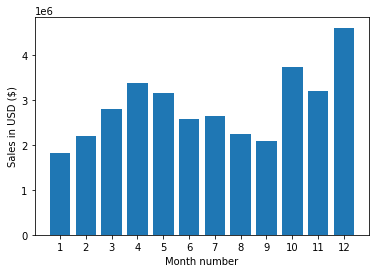

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel("Month number")
plt.show()
plt.savefig('./Images/q_1.png',bbox_inches="tight",dpi=150)

#### Question 2:What city had the highest number of sales

In [13]:
results= all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


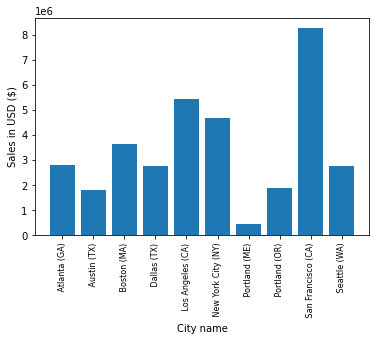

In [14]:
import matplotlib.pyplot as plt

cities = [city for city,df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation='vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel("City name")
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA)


In [16]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA)


In [18]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME),1,35
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA),7,24
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY),9,46
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA),16,47
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA),20,32


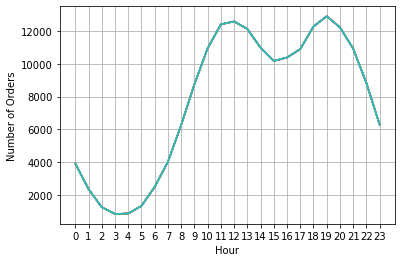

In [19]:
hours = [hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

# 11 am (11) or 7pm (19) is the recommended time for advertisement


#### Question 4: What products are most often sold together

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME),1,35
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA),7,24
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY),9,46
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA),16,47
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA),20,32


In [21]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

/home/hasnat/anaconda3/envs/ML_env_python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
16,150518,"Macbook Pro Laptop,iPhone"
82,150582,"iPhone,Lightning Charging Cable"
91,150590,"Apple Airpods Headphones,AAA Batteries (4-pack)"
119,150617,"Google Phone,USB-C Charging Cable"
154,150651,"Google Phone,USB-C Charging Cable"


In [22]:

from itertools import  combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)





# Combination of these items can be offered as discounts to the customers




('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME),1,35
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA),7,24
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY),9,46
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA),16,47
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA),20,32


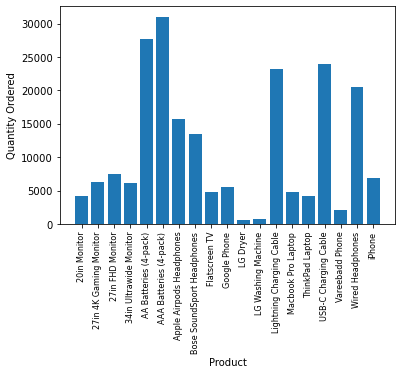

In [24]:
product_group= all_data.groupby('Product')

quantity_ordered= product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]

plt. bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt. xticks(products, rotation = 'vertical',size =8)
plt.show()

In [25]:
prices = all_data.groupby(['Product']).mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/home/hasnat/anaconda3/envs/ML_env_python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


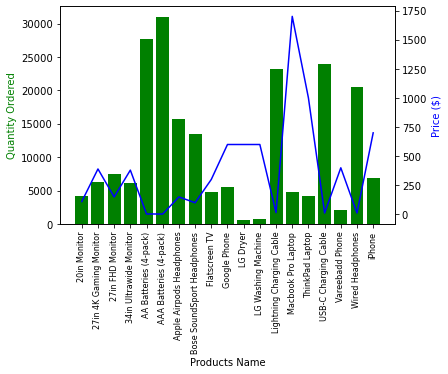

In [26]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,color='b')

ax1.set_xlabel('Products Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price ($)',color='b')

ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()
